In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Credit Card Customer Data.csv")

In [3]:
data.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [4]:
data.tail(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
650,651,78996,195000,10,1,12,2
651,652,78404,132000,9,1,12,2
652,653,28525,156000,8,1,8,0
653,654,51826,95000,10,0,15,1
654,655,65750,172000,10,1,9,1
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [5]:
data.shape

(660, 7)

In [6]:
data.size

4620

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [8]:
data.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [10]:
data.drop(columns=["Sl_No"],inplace=True)

In [11]:
data

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3
...,...,...,...,...,...,...
655,51108,99000,10,1,10,0
656,60732,84000,10,1,13,2
657,53834,145000,8,1,9,1
658,80655,172000,10,1,15,0


In [12]:
scaler = StandardScaler()
df_array = scaler.fit_transform(data)
data_scaled = pd.DataFrame(df_array, columns = data.columns)

In [13]:
data_scaled

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...,...
655,-0.157505,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,0.218310,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,-0.051055,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,0.996298,3.655235,2.443892,-0.860451,4.224968,-1.251537


In [14]:
data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,1.076580e-17,1.000758,-1.713365,-0.832392,-0.049474,0.861479,1.745585
Avg_Credit_Limit,660.0,8.612639e-17,1.000758,-0.839808,-0.653623,-0.440840,0.357097,4.399975
Total_Credit_Cards,660.0,4.306320e-17,1.000758,-1.710864,-0.787585,0.135694,0.597334,2.443892
Total_visits_bank,660.0,-4.306320e-17,1.000758,-1.473731,-0.860451,-0.247170,0.979390,1.592670
Total_visits_online,660.0,7.536059e-17,1.000758,-0.888380,-0.547490,-0.206600,0.475180,4.224968
Total_calls_made,660.0,-8.612639e-17,1.000758,-1.251537,-0.902271,-0.203739,0.494794,2.241125


<AxesSubplot: >

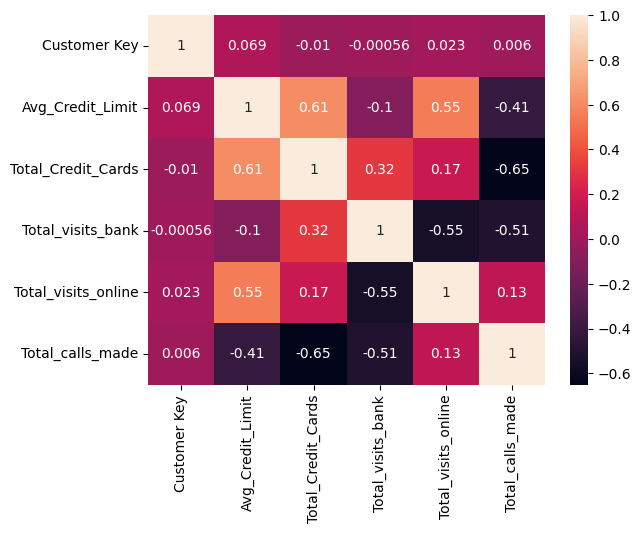

In [15]:
sns.heatmap(data.corr(),annot=True)

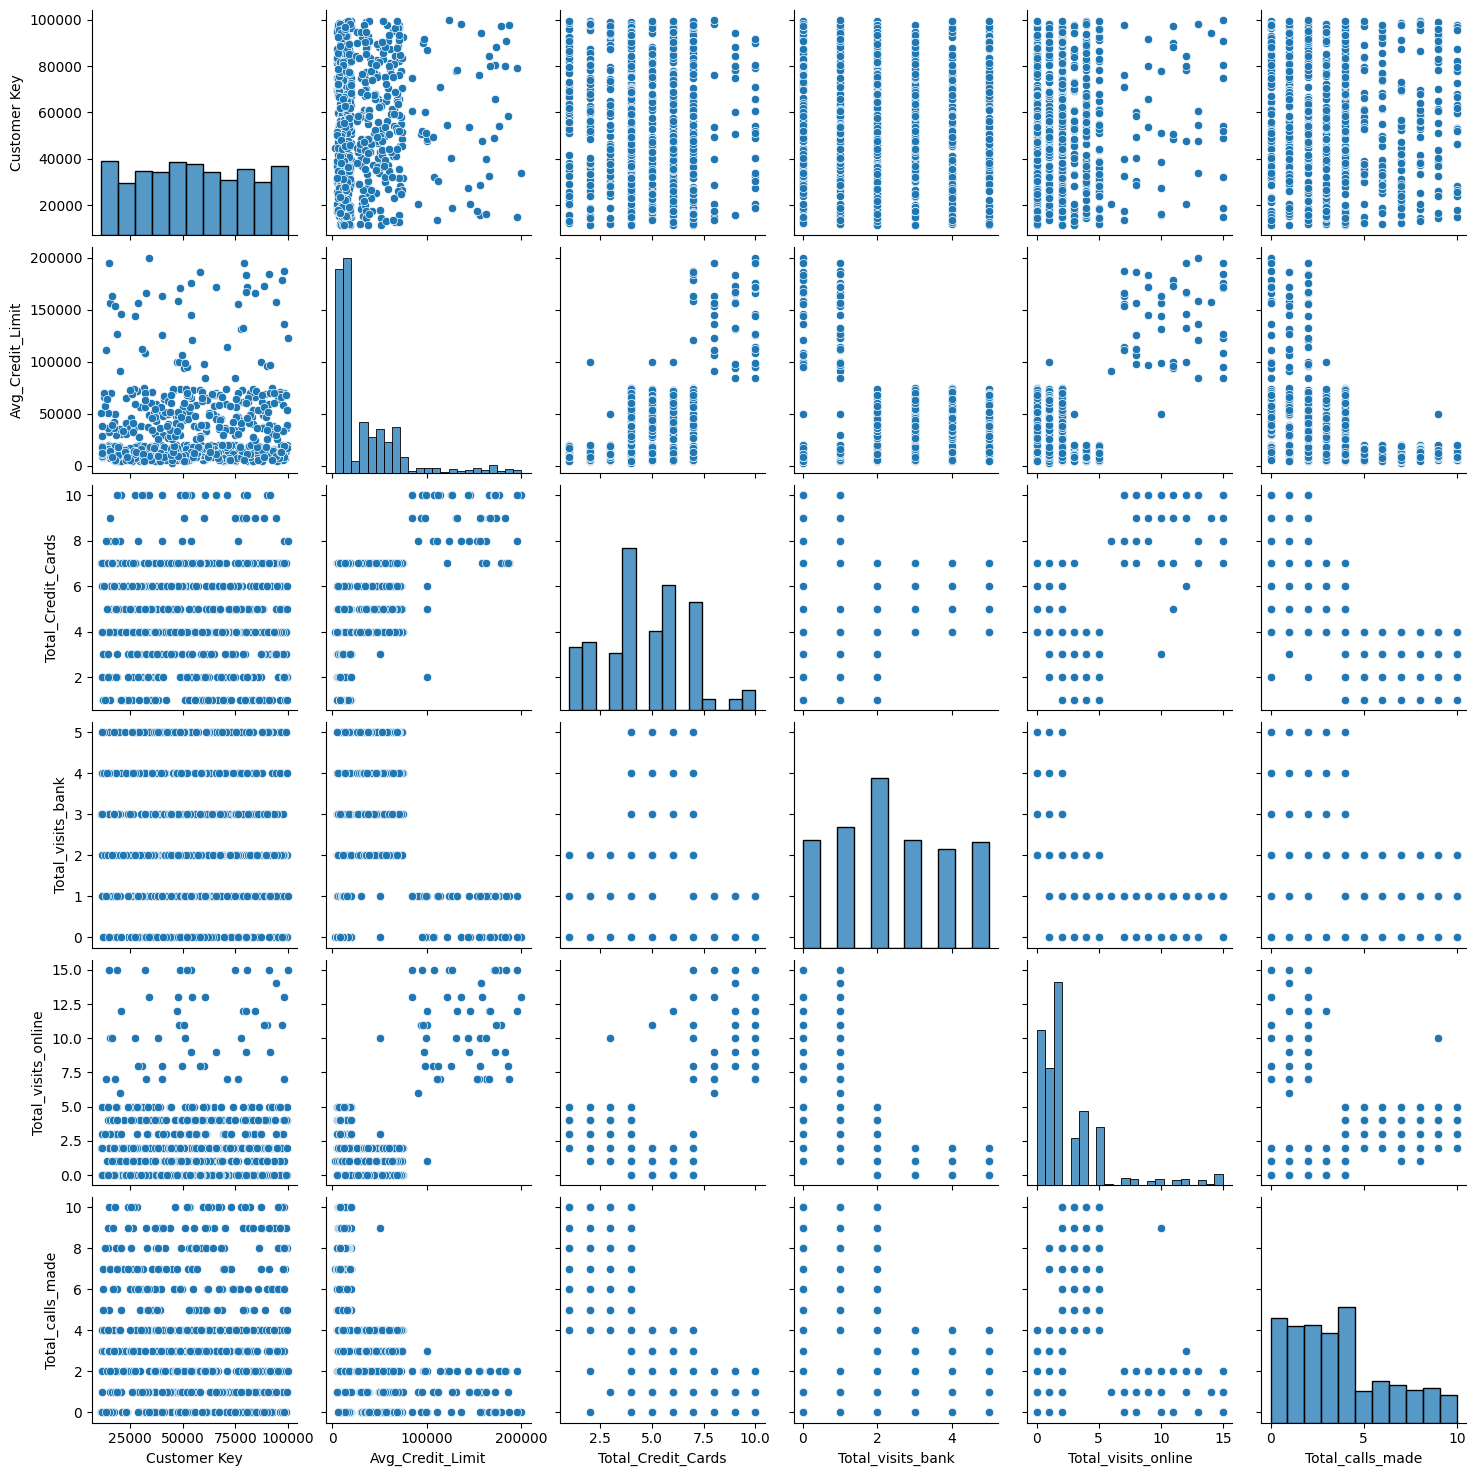

In [16]:
sns.pairplot(data)

# Elbow

In [17]:
elbow = {}
for k in range(1,9):
    cluster = KMeans(n_clusters = k,random_state = 1)
    cluster.fit(data_scaled)
    elbow[k] = cluster.inertia_

In [18]:
elbow

{1: 3960.0,
 2: 2700.9848113806497,
 3: 1592.8133253795984,
 4: 1309.5101821443156,
 5: 1139.4529381839895,
 6: 1051.1331585063076,
 7: 986.666222142332,
 8: 940.3036209944801}

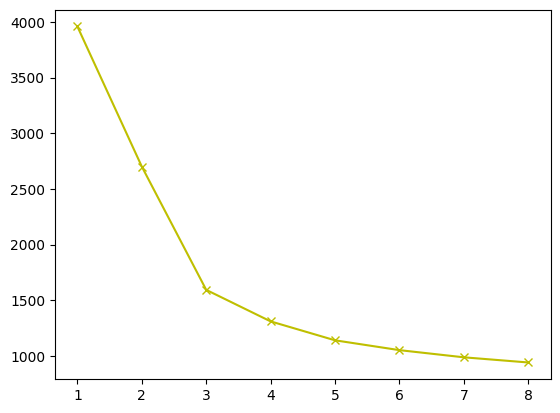

In [19]:
plt.plot(elbow.keys(),elbow.values(),"xy-")

# Silhouette

In [20]:
Silhouette = {}

for k in range(2,10):
    cluster = KMeans(n_clusters = k, random_state = 1)
    cluster.fit(data_scaled)
    labels = cluster.predict(data_scaled)
    Silhouette[k] = silhouette_score(data_scaled, labels)

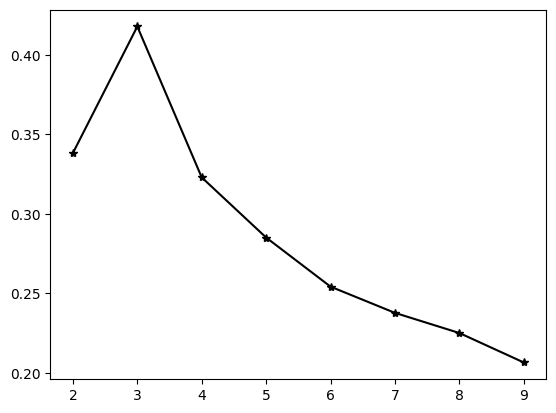

In [21]:
plt.plot(Silhouette.keys(),Silhouette.values(),color="black",marker='*')

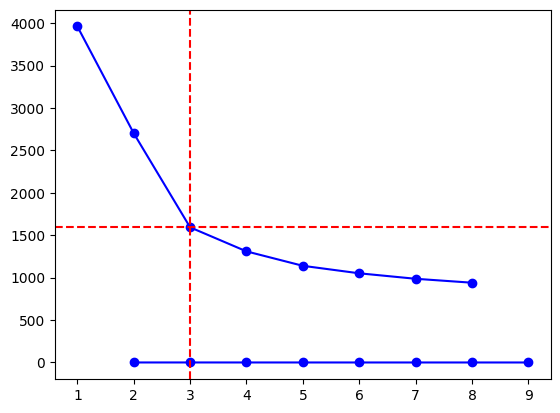

In [22]:
plt.plot(elbow.keys(),elbow.values(),color="b",marker="o")
plt.plot(Silhouette.keys(),Silhouette.values(),color="b",marker="o")
plt.axvline(x = 3, color = 'r', linestyle = '--')
plt.axhline(y = elbow[3], color = 'r', linestyle = '--')

# From elbow and Silhouette score we get optimum value of k

In [23]:
cluster = KMeans(n_clusters = 3, random_state = 1)
cluster.fit(data_scaled)
labels = cluster.predict(data_scaled)

In [24]:
data_scaled["Lables"] = labels
data["Labels"] = labels

In [25]:
data

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels
0,87073,100000,2,1,1,0,1
1,38414,50000,3,0,10,9,0
2,17341,50000,7,1,3,4,1
3,40496,30000,5,1,1,4,1
4,47437,100000,6,0,12,3,2
...,...,...,...,...,...,...,...
655,51108,99000,10,1,10,0,2
656,60732,84000,10,1,13,2,2
657,53834,145000,8,1,9,1,2
658,80655,172000,10,1,15,0,2


In [26]:
data["Labels"].value_counts()

1    386
0    224
2     50
Name: Labels, dtype: int64

In [27]:
mean = data.groupby(data.Labels).mean()

In [28]:
median = data.groupby(data.Labels).median()

In [29]:
mean_median = pd.concat([mean,median],axis=0)
mean_median.index = ['0 Mean', '1 Mean', '2 Mean', '0 Median', '1 Median', '2 Median']

In [30]:
mean_median.T

,0 Mean,1 Mean,2 Mean,0 Median,1 Median,2 Median
Customer Key,55239.830357,54881.329016,56708.76,55235.5,52731.0,53875.0
Avg_Credit_Limit,12174.107143,33782.383420,141040.00,12000.0,31000.0,145500.0
Total_Credit_Cards,2.410714,5.515544,8.74,2.0,6.0,9.0
Total_visits_bank,0.933036,3.489637,0.60,1.0,3.0,1.0
Total_visits_online,3.553571,0.981865,10.90,4.0,1.0,11.0
Total_calls_made,6.870536,2.000000,1.08,7.0,2.0,1.0


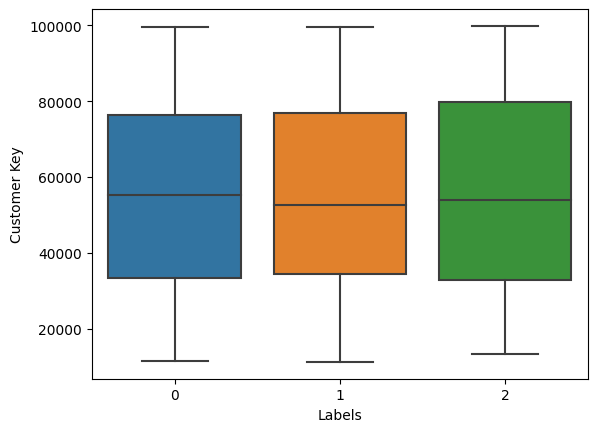

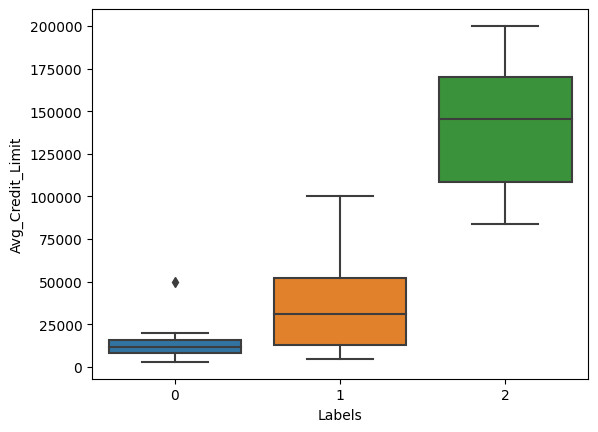

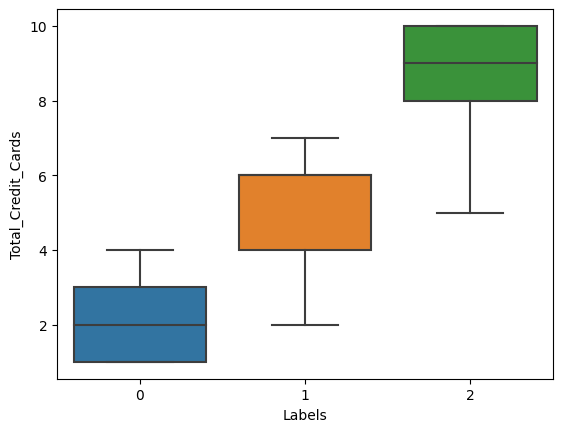

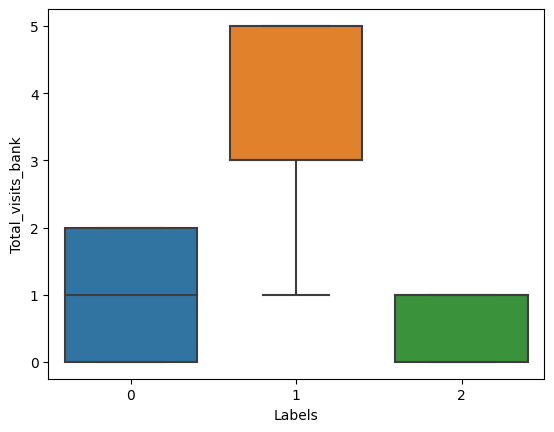

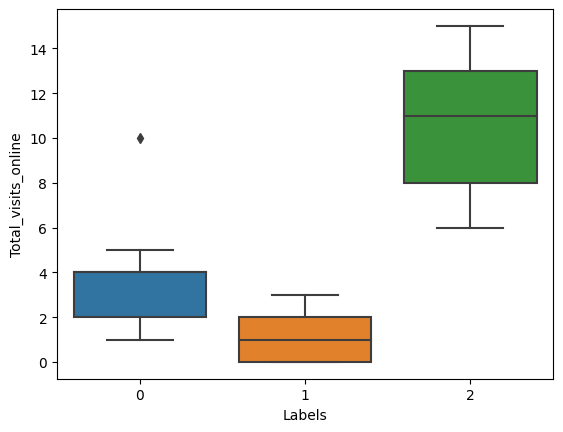

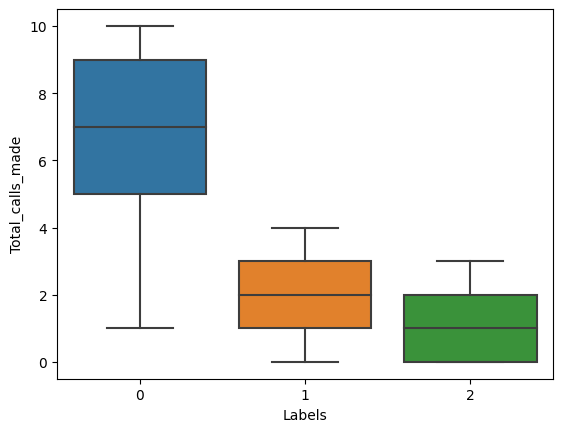

In [31]:
cols_visualise = ['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for col in cols_visualise:
    sns.boxplot(x = 'Labels', y = col, data = data)
    plt.show()

Text(0, 0.5, 'Count')

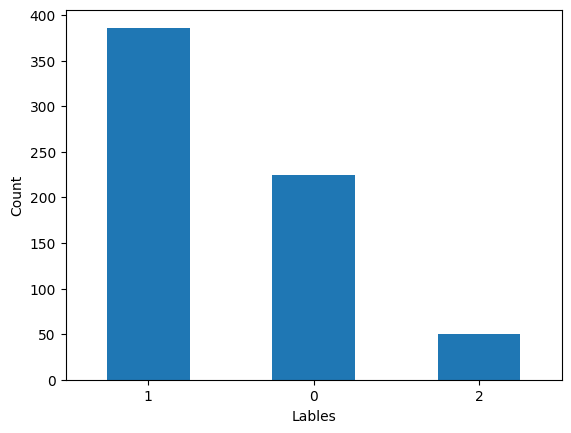

In [32]:
data["Labels"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("Lables")
plt.ylabel("Count")

In [33]:
from scipy.stats import shapiro

test = [386,224,50]

stat , p = shapiro(test)

print(p*100)

if p>0.05:
    print("Normally distributed")
    
else:
    print("its not normally distributed")

96.0631787776947
Normally distributed


### Cluster Profiles:

⚫ Cluster 2 has only 50 observations. As observed from the barplot, this group consists of outlier i.e Customer Holds More  Credit_Cards.
 
⚫ Cluster 0 customers seems to have less Credit_Cards.

⚫ Overall, this clustering solution does give us good insights into potential clusters of similar customers.


# --------------------------------------------------------------------------------------------------------

# Hierarchical Clustering
Hierarchical Clustering
Let's try to create clusters using Agglomerative Hierarchical clustering.
Here, we decide the number of clusters using a concept called Dendrogram which is a tree-like diagram that records the sequences of merges or splits.

In [34]:
methods = ["single"
          ,"average"
          ,"complete"]

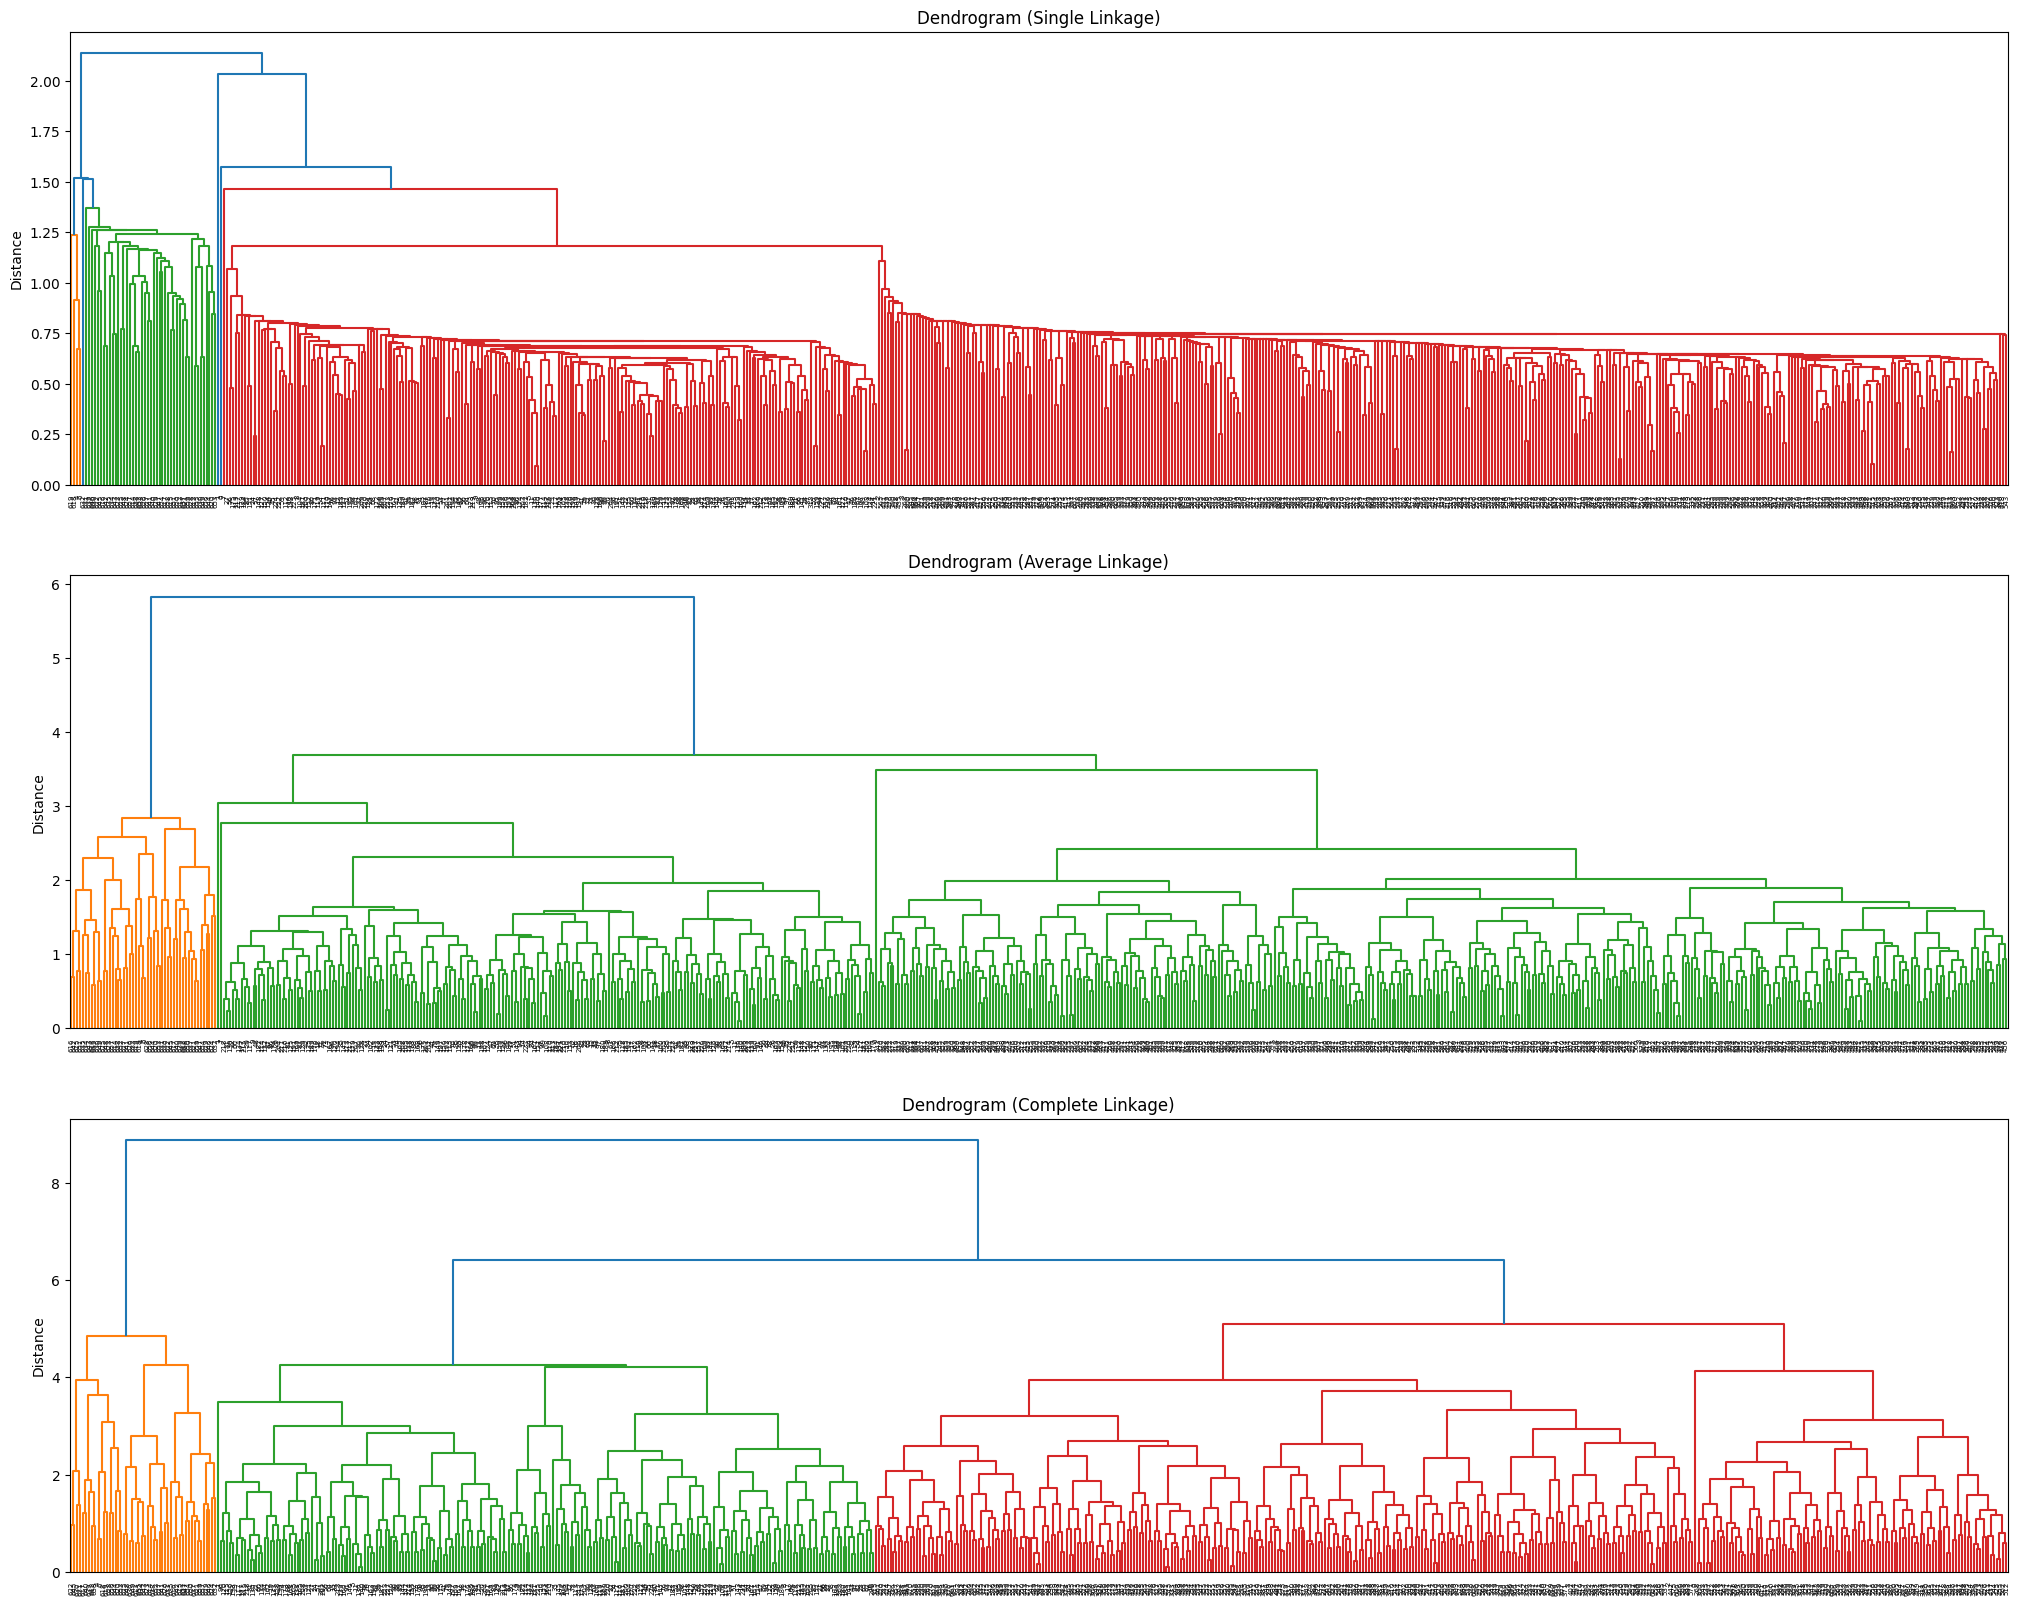

In [35]:
fig ,axs = plt.subplots(len(methods),1,figsize=(25,20))

for i, method in enumerate(methods):
    Z = linkage(data_scaled ,metric = "euclidean" ,method=method)
    dendrogram(Z, ax = axs[i]);

    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')

    axs[i].set_ylabel('Distance')

**Observations:**

- We can see that the complete linkage gives better separated clusters. A cluster is considered better separated if the vertical distance connecting those clusters is higher.
- Now, we can set a threshold distance and draw a horizontal line. The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.

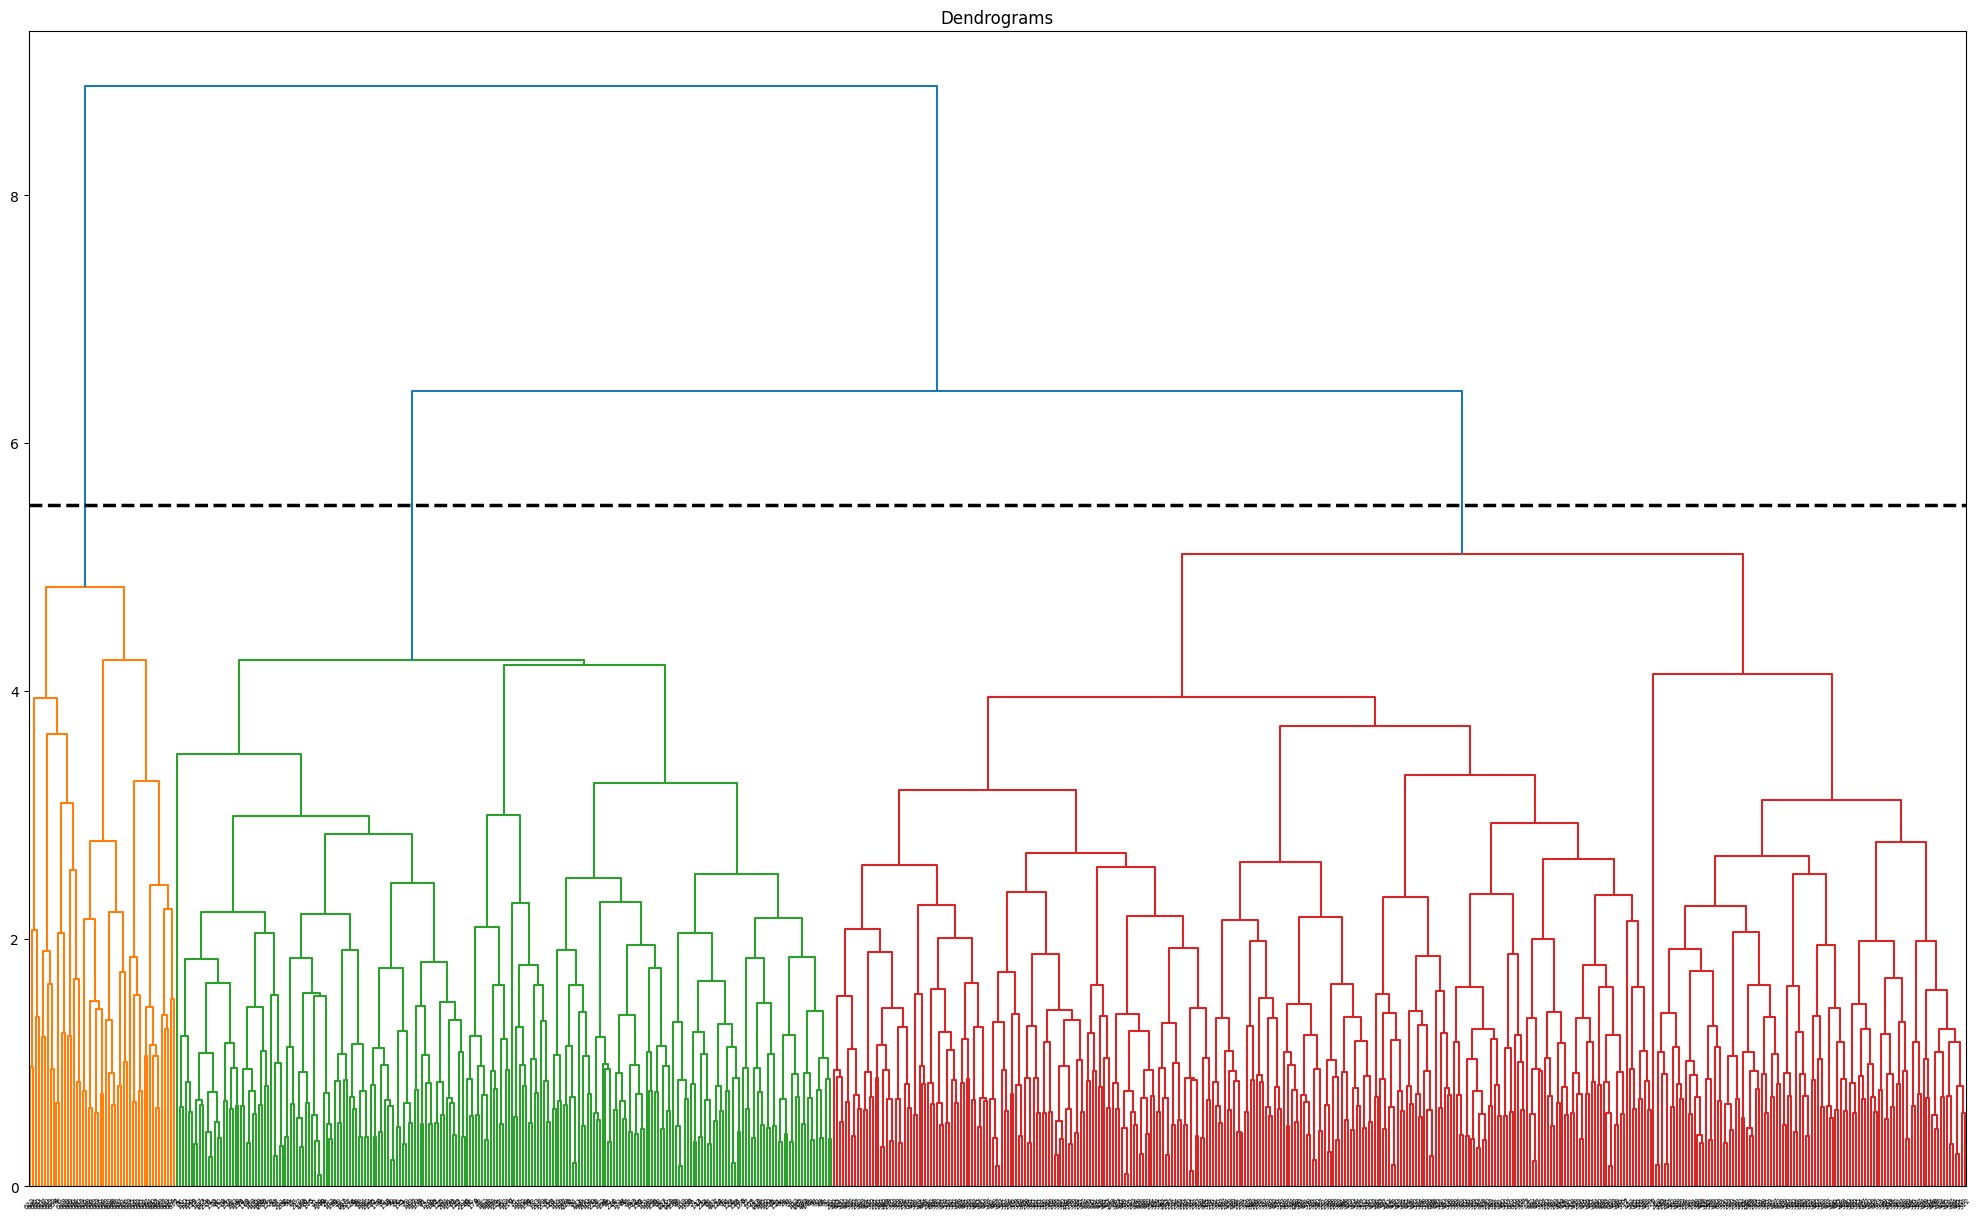

In [36]:
plt.figure(figsize = (25,15))

plt.title("Dendrograms")

dend = dendrogram(linkage(data_scaled, method = 'complete'))

plt.xticks(rotation=45)

plt.axhline(y = 5.5, color = 'black', linestyle = '--', alpha = 1, linewidth=2.5)

In [37]:
## 3 clusters

In [38]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')

hierarchical.fit(data_scaled)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [39]:
data_scaled_copy = data_scaled.copy()
data_scaled_copy['HCLabels'] = hierarchical.labels_

data['HCLabels'] = hierarchical.labels_

In [40]:
data.HCLabels.value_counts()

0    386
2    224
1     50
Name: HCLabels, dtype: int64

In [41]:
data.head(10)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels,HCLabels
0,87073,100000,2,1,1,0,1,0
1,38414,50000,3,0,10,9,0,2
2,17341,50000,7,1,3,4,1,0
3,40496,30000,5,1,1,4,1,0
4,47437,100000,6,0,12,3,2,1
5,58634,20000,3,0,1,8,0,2
6,48370,100000,5,0,11,2,2,1
7,37376,15000,3,0,1,1,0,2
8,82490,5000,2,0,2,2,0,2
9,44770,3000,4,0,1,7,0,2


In [42]:
data[data.HCLabels == 0]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels,HCLabels
0,87073,100000,2,1,1,0,1,0
2,17341,50000,7,1,3,4,1,0
3,40496,30000,5,1,1,4,1,0
228,54838,10000,7,2,0,0,1,0
229,35254,8000,7,2,1,4,1,0
...,...,...,...,...,...,...,...,...
607,90191,34000,6,3,1,0,1,0
608,49341,47000,4,4,1,0,1,0
609,11562,38000,4,3,2,0,1,0
610,16253,39000,7,2,1,0,1,0


In [43]:
data[data.HCLabels == 1]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels,HCLabels
4,47437,100000,6,0,12,3,2,1
6,48370,100000,5,0,11,2,2,1
612,94391,157000,9,1,14,1,2,1
613,50598,94000,9,1,11,0,2,1
614,40019,163000,8,1,7,1,2,1
615,77910,131000,9,1,10,1,2,1
616,89832,96000,10,1,11,2,2,1
617,98216,136000,8,0,13,0,2,1
618,54495,121000,7,0,13,2,2,1
619,47650,158000,7,0,13,0,2,1


In [44]:
data[data.HCLabels == 2]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels,HCLabels
1,38414,50000,3,0,10,9,0,2
5,58634,20000,3,0,1,8,0,2
7,37376,15000,3,0,1,1,0,2
8,82490,5000,2,0,2,2,0,2
9,44770,3000,4,0,1,7,0,2
...,...,...,...,...,...,...,...,...
224,96163,12000,4,1,5,9,0,2
225,61234,16000,4,1,2,5,0,2
226,55849,8000,1,2,4,8,0,2
227,56156,8000,2,2,3,8,0,2


In [45]:
original_features = data.columns[0:7]

In [46]:
mean = data.groupby('HCLabels').mean()

median = data.groupby('HCLabels').median()

mean_median = pd.concat([mean, median], axis = 0)

mean_median.index = ['0 Mean', '1 Mean', '2 Mean', '0 Median', '1 Median', '2 Median']

mean_median[original_features].T

,0 Mean,1 Mean,2 Mean,0 Median,1 Median,2 Median
Customer Key,54881.329016,56708.76,55239.830357,52731.0,53875.0,55235.5
Avg_Credit_Limit,33782.383420,141040.00,12174.107143,31000.0,145500.0,12000.0
Total_Credit_Cards,5.515544,8.74,2.410714,6.0,9.0,2.0
Total_visits_bank,3.489637,0.60,0.933036,3.0,1.0,1.0
Total_visits_online,0.981865,10.90,3.553571,1.0,11.0,4.0
Total_calls_made,2.000000,1.08,6.870536,2.0,1.0,7.0
Labels,1.000000,2.00,0.000000,1.0,2.0,0.0


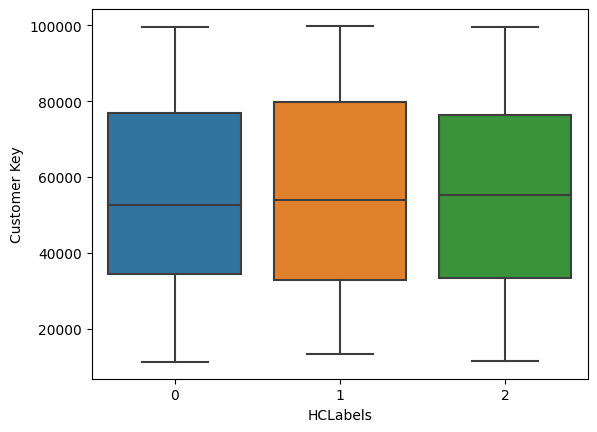

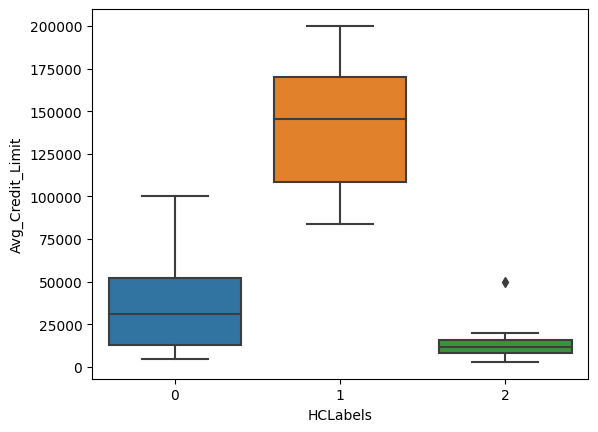

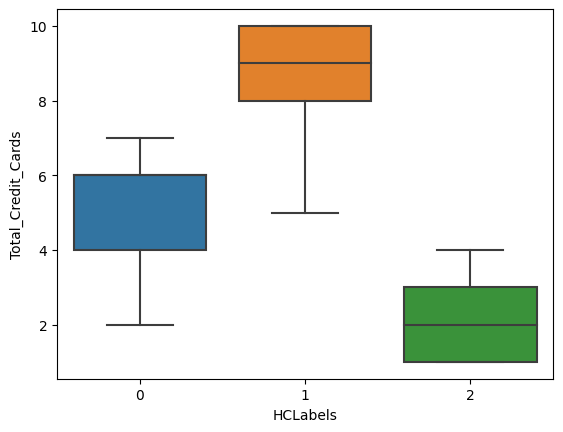

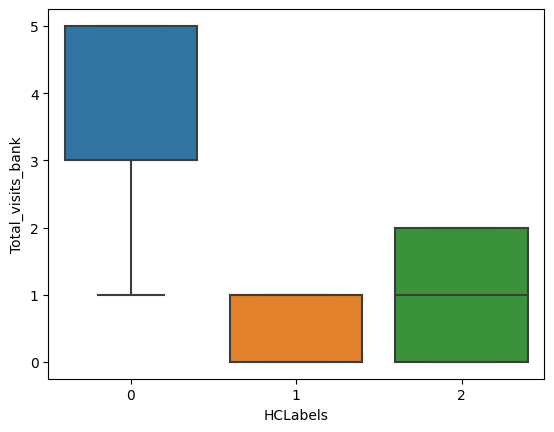

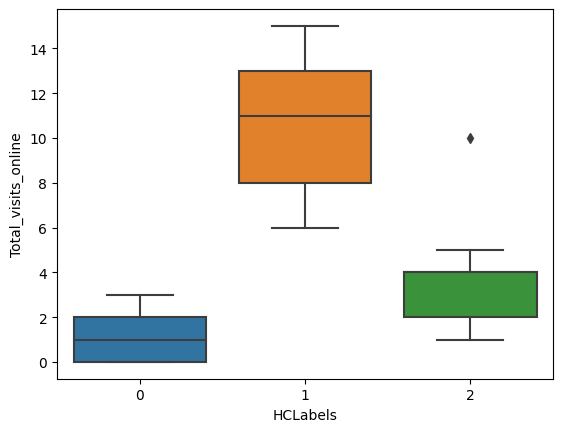

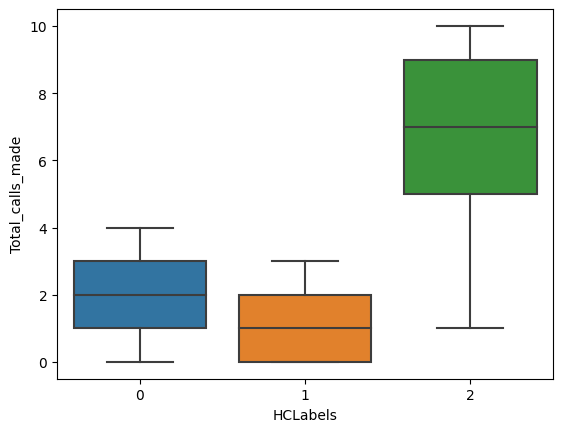

In [47]:
cols_visualise = ['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for col in cols_visualise:
    sns.boxplot(x = 'HCLabels', y = col, data = data)
    plt.show()

### How to reach me:
✉: raghavendrakn076@gmail.com
📞: +91 9353888374
🔗: [www.raghavendraportfolio.com](https://www.raghavendraportfolio.com)

### THANK YOU